### Introduction.
- The main feature of unsupervised learning algorithms, when compared to classification and regression methods, is that input data are unlabeled (i.e. no labels or classes given) and that the algorithm learns the structure of the data without any assistance. This creates two main differences. First, it allows us to process large amounts of data because the data does not need to be manually labeled. Second, it is difficult to evaluate the quality of an unsupervised algorithm due to the absence of an explicit goodness metric as used in supervised learning.

- One of the most common tasks in unsupervised learning is dimensionality reduction. On one hand, dimensionality reduction may help with data visualization (e.g. t-SNA method) while, on the other hand, it may help deal with the multicollinearity of your data and prepare the data for a supervised learning method (e.g. decision trees).

### Principle Component Analysis.(PCA)
#### Intuition, theories, and application issues.

- More generally speaking, all observations can be considered as an ellipsoid (Ellipse) in a subspace of an initial feature space, and the new basis set in this subspace is aligned with the ellipsoid axes. This assumption lets us remove highly correlated features since basis set vectors are orthogonal.
- In the general case, the resulting ellipsoid dimensionality matches the initial space dimensionality, but the assumption that our data lies in a subspace with a smaller dimension allows us to cut off the "excessive" space with the new projection (subspace). We accomplish this in a 'greedy' fashion, sequentially selecting each of the ellipsoid axes by identifying where the dispersion is maximal.

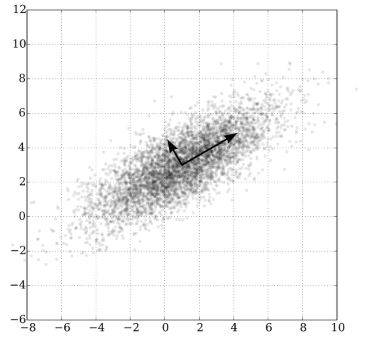

In [1]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

**But while selecting the number of principle components we should have to consider always less than equal to N number of dimensions.**

- We begin by computing the dispersion and the covariance of the initial features. This is usually done with the covariance matrix.

**`cov(Xi,Xj)=E[(Xi−μi)(Xj−μj)]`**

- where  μi  is the expected value of the  i th feature. It is worth noting that the covariance is symmetric, and the covariance of a vector with itself is equal to its dispersion.

- Therefore the covariance matrix is symmetric with the dispersion of the corresponding features on the diagonal. Non-diagonal values are the covariances of the corresponding pair of features. In terms of matrices where  `X`  is the matrix of observations, the covariance matrix is as follows:

**`Σ=E[(X−E[X])(X−E[X])T]`**

**Quick recap:**

- matrices, as linear operators, have eigenvalues and eigenvectors. They are very convenient because they describe parts of our space that do not rotate and only stretch when we apply linear operators on them; eigenvectors remain in the same direction but are stretched by a corresponding eigenvalue. Formally, a matrix  `M`  with eigenvector  `wi`  and eigenvalue  `λi`  satisfy this equation:  `Mwi=λiwi` .

- The covariance matrix for a sample  `X`  can be written as a product of  `XTX` . According to the Rayleigh quotient, the maximum variation of our sample lies along the eigenvector of this matrix and is consistent with the maximum eigenvalue. Therefore, the principal components we aim to retain from the data are just the eigenvectors corresponding to the top- k  largest eigenvalues of the matrix.

- The next steps are easier to digest. We multiply the matrix of our data  `X`  by these components to get the projection of our data onto the orthogonal basis of the chosen components. If the number of components was smaller than the initial space dimensionality, remember that we will lose some information upon applying this transformation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')
%config InlineBackend.figure_format = 'retina'
from pandas_profiling import ProfileReport

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('Wholesale customers data.csv')

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.drop(columns=['Channel','Region'],inplace=True)

In [6]:
data.tail()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125
439,2787,1698,2510,65,477,52


In [7]:
data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [9]:
round(data.describe(include='all'),1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.0,440.0,440.0,440.0,440.0,440.0
mean,12000.3,5796.3,7951.3,3071.9,2881.5,1524.9
std,12647.3,7380.4,9503.2,4854.7,4767.9,2820.1
min,3.0,55.0,3.0,25.0,3.0,3.0
25%,3127.8,1533.0,2153.0,742.2,256.8,408.2
50%,8504.0,3627.0,4755.5,1526.0,816.5,965.5
75%,16933.8,7190.2,10655.8,3554.2,3922.0,1820.2
max,112151.0,73498.0,92780.0,60869.0,40827.0,47943.0


In [10]:
report = ProfileReport(data)

In [11]:
report  

In [12]:
report.to_widgets() #The HTML report can be included in a Jupyter notebook:

#### Saving the report
If you want to generate a `HTML` report file, save the ProfileReport to an object and use the `to_file()` function:

In [13]:
report.to_file("your_report.html")

### Go for the Clustering part.

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [16]:
Cluster_range = range(1,50)
Ineria = list()

for i in Cluster_range:
    km = KMeans(n_clusters=i,max_iter=100,verbose=0,random_state=42)
    km.fit(X)
    inertia = km.inertia_
    Ineria.append(inertia)

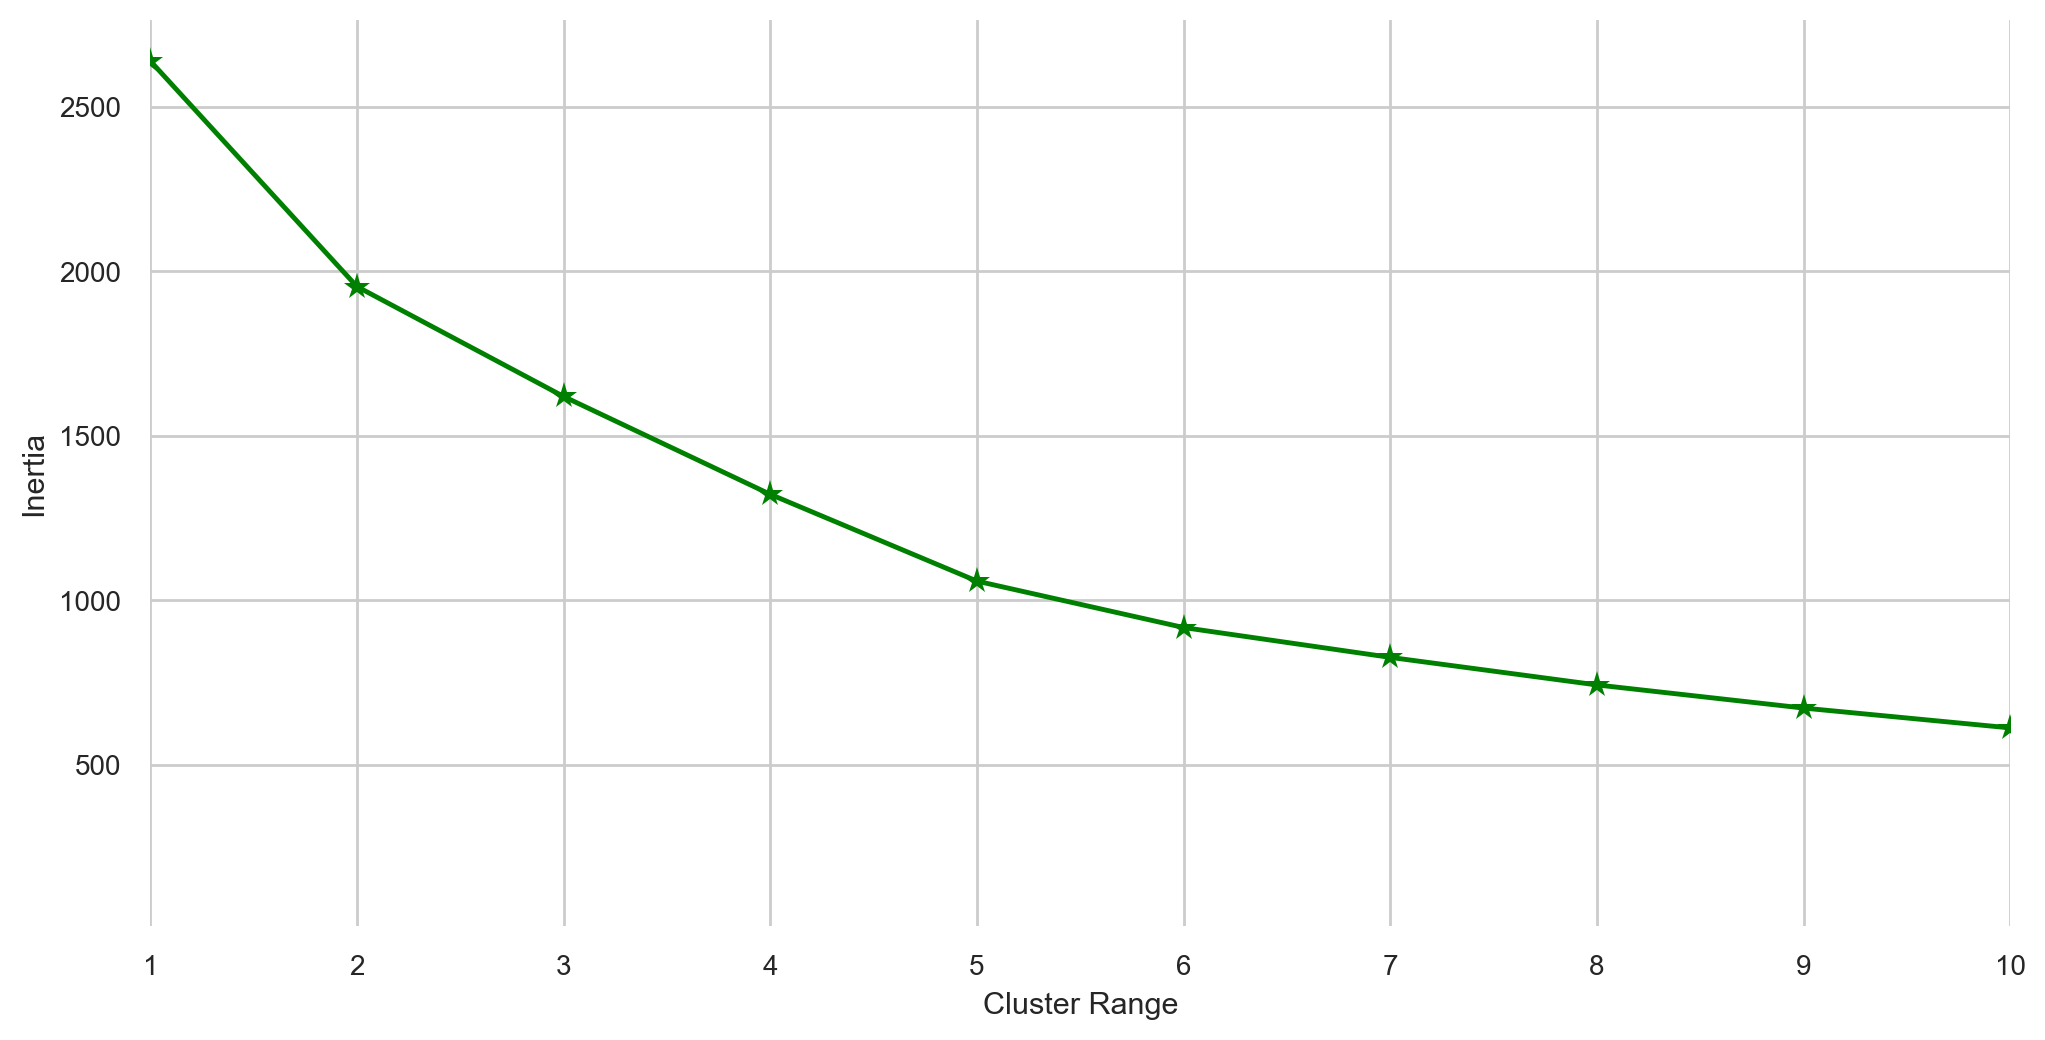

In [17]:
plt.figure(figsize=(12,6),dpi=100)
plt.plot(Cluster_range,Ineria,color='g',marker='*',markersize=10)
plt.grid()
plt.xlabel('Cluster Range')
plt.ylabel('Inertia')
plt.xlim([1,10])
plt.show()

**Here,We are understanding that the at point 5 the ebelow is occure and point 5  are going to use as optimal number of cluster.**

In [18]:
km = KMeans(n_clusters=2,max_iter=100,verbose=0,random_state=42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [19]:
label=km.labels_

In [20]:
len(set(label))

2

In [21]:
centroid =km.cluster_centers_

In [22]:
centroid = list(centroid)

In [23]:
score = round(silhouette_score(X,label),1)
score

0.6

**Since,the data having mutidimensionality,So can not see the each and every cluster by nakedeye.So in order to get all the visualization we will reduce the High-Dimensional data to Low dimensional data.Since we have right now 2 clusters as well as we having the 6-Dimesions inside the data.**

## Principle Component Analysis 
-  It is the non parametric unsupervised machine learning alogorithm which help us to use as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.
- In order to handle “curse of dimensionality” and avoid issues like over-fitting in high dimensional space, methods like Principal Component analysis is used.
- This method combines highly correlated variables together to form a smaller number of an artificial set of variables which is called “principal components” that account for most variance in the data.
- In that analysis the data is transform in the arthogonal component in such way that they will always be maintain itself at  the parpandicular to each so that muti-coliliearity is total gets vanish.
- Its most preference to that component which can give high variance ratio.That variance ratio will get decrease gradualy as we increse the PCA component.

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca=PCA(n_components=2,random_state=42) #Projecting the 3 component from the 6 dimensions.

In [26]:
projected =pca.fit_transform(X)

In [27]:
print(X.shape)
print(projected.shape)

(440, 6)
(440, 2)


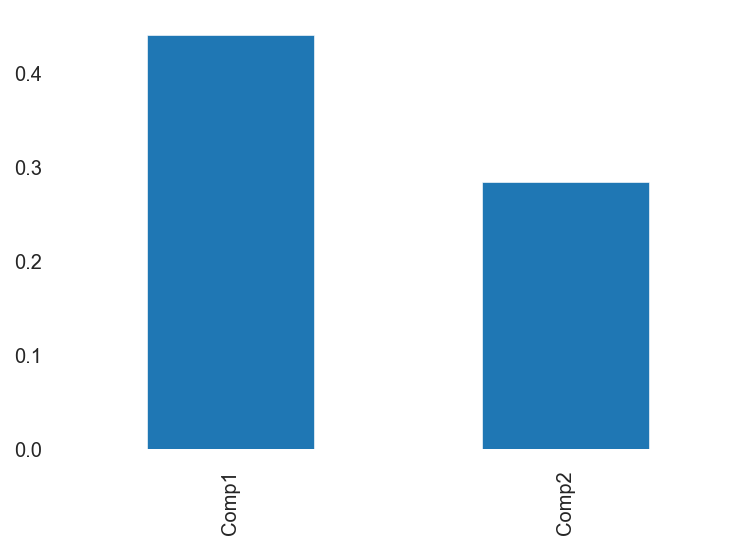

In [28]:
explained_variance=pd.Series(pca.explained_variance_ratio_,index=['Comp1','Comp2'])
explained_variance.plot(kind='bar')
plt.show()

In [29]:
pca.n_components

2

In [33]:
project = pd.DataFrame(projected,columns=['Col1','Col2'])

In [34]:
project['Target'] = label

In [35]:
project.head()

,Col1,Col2,Target
0,0.193291,-0.305100,0
1,0.434420,-0.328413,0
2,0.811143,0.815096,0
3,-0.778648,0.652754,0
4,0.166287,1.271434,0


**We can now plot the first two principal components of each point to learn about the data:**

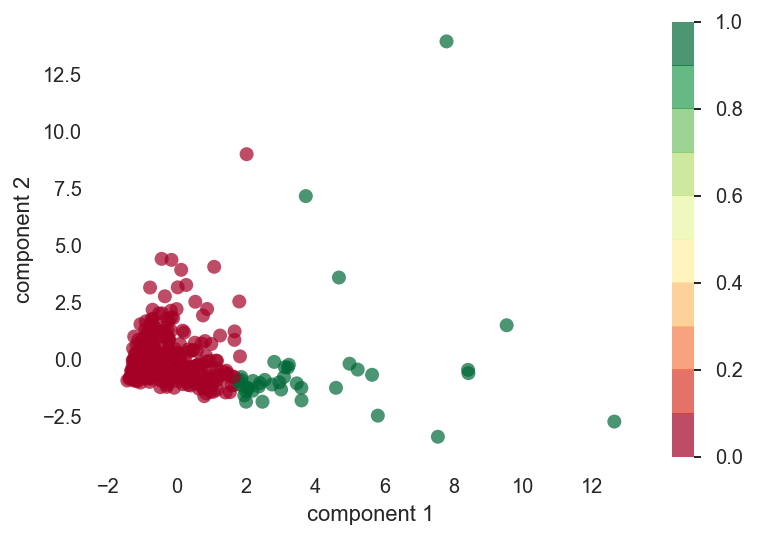

In [36]:
plt.scatter(project.Col1,project.Col2,c=project.Target,edgecolor='none',alpha=0.7,cmap=plt.cm.get_cmap('RdYlGn', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

### If supose I will get the number of label more than than two that time we will do as below way.

In [37]:
km = KMeans(n_clusters=5,max_iter=100,verbose=0,random_state=42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [38]:
label=km.labels_

In [39]:
score = round(silhouette_score(X,label),1)
score

0.4

In [40]:
pca=PCA(n_components=2,random_state=42)
pca_data=pca.fit_transform(X)

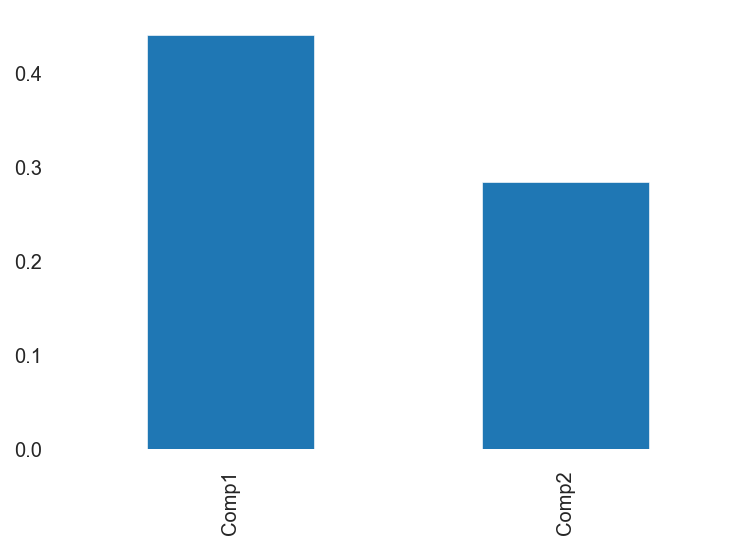

In [41]:
explained_variance=pd.Series(pca.explained_variance_ratio_,index=['Comp1','Comp2'])
explained_variance.plot(kind='bar')
plt.show()

In [42]:
project = pd.DataFrame(projected,columns=['Col1','Col2'])
project['Target'] = label
project.head()

,Col1,Col2,Target
0,0.193291,-0.305100,4
1,0.434420,-0.328413,0
2,0.811143,0.815096,0
3,-0.778648,0.652754,4
4,0.166287,1.271434,1


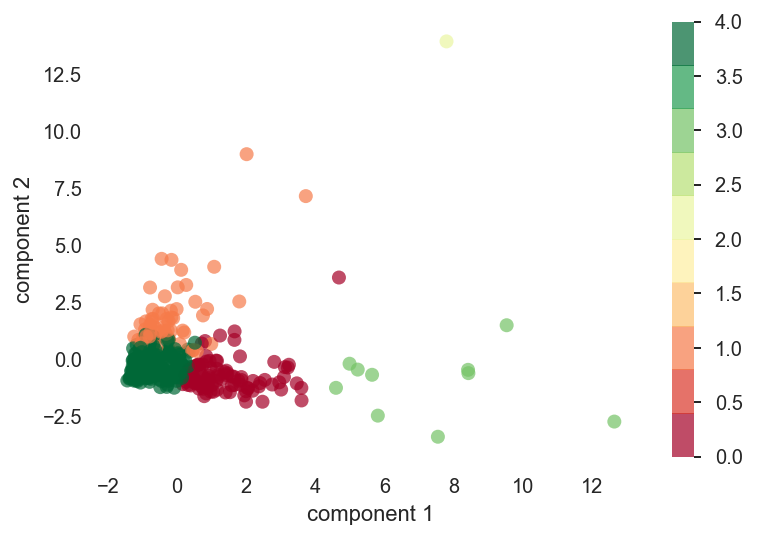

In [43]:
plt.scatter(project.Col1,project.Col2,c=project.Target,edgecolor='none',alpha=0.7,cmap=plt.cm.get_cmap('RdYlGn', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

# t-SNE dimesional reduction techniques.

**t-Distributed Stochastic Neighbor Embedding (t-SNE)**

- t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008.

**t-SNE vs PCA**
- If you’re familiar with Principal Components Analysis (PCA), then like me, you’re probably wondering the difference between PCA and t-SNE. 
- The first thing to note is that PCA was developed in 1933 while t-SNE was developed in 2008. A lot has changed in the world of data science since 1933 mainly in the realm of compute and size of data. Second, **PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances.** In other words, things that are different end up far apart. **This can lead to poor visualization especially when dealing with non-linear manifold structures. Think of a manifold structure as any geometric shape like: cylinder, ball, curve, etc.**

- **t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance.** Laurens illustrates the PCA and t-SNE. You can see that due to the non-linearity of this toy dataset (manifold) and preserving large distances that PCA would incorrectly preserve the structure of the data.

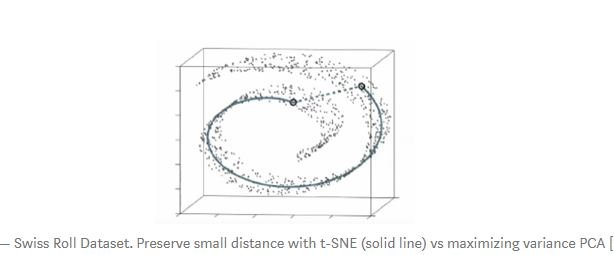

In [137]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

**How t-SNE works**
- Now that we know why we might use t-SNE over PCA, lets discuss how t-SNE works. The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.

**Step 1** 
- Measure similarities between points in the high dimensional space. Think of a bunch of data points scattered on a 2D space (Figure 2). For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors. Normal range for perplexity is between 5 and 50.

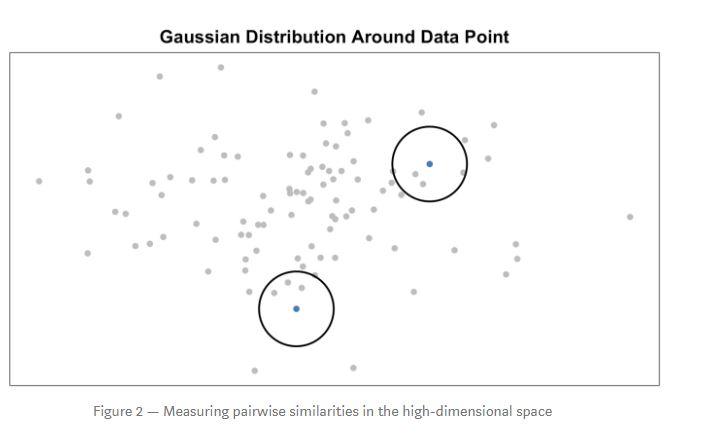

In [138]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

**Step 2**
- It is similar to step 1, but instead of using a Gaussian distribution you use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution (Figure 3). This gives us a second set of probabilities (Qij) in the low dimensional space. As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

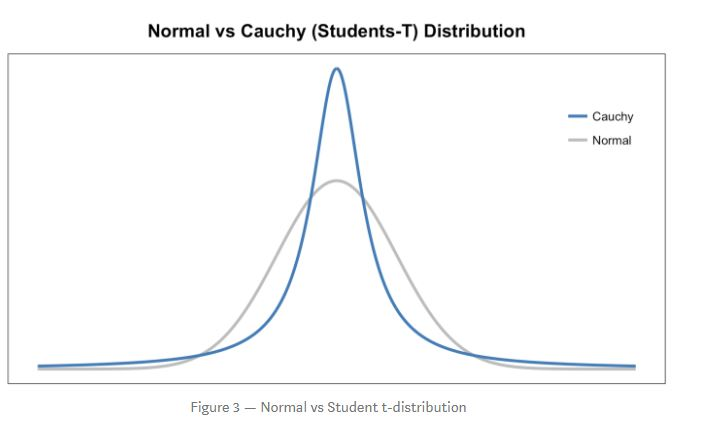

In [139]:
from IPython.display import Image
Image('C:/Users/Microsoft/Downloads/Capture.jpg')

The **last step** is that we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). I won’t get too much into KL except that it is an asymmetrical approach that efficiently compares large Pij and Qij values. Finally, we use gradient descent to minimize our KL cost function.

#### Applications
- It use of t-SNE in areas like climate research, computer security, bioinformatics, cancer research, etc. t-SNE could be used on high-dimensional data and then the output of those dimensions then become inputs to some other classification model.
-  t-SNE could be used to investigate, learn, or evaluate segmentation. Often times we select the number of segments prior to modeling or iterate after results. t-SNE can often times show clear separation in the data. This can be used prior to using your segmentation model to select a cluster number or after to evaluate if your segments actually hold up. t-SNE however is not a clustering approach since it does not preserve the inputs like PCA and the values may often change between runs so it’s purely for exploration.

## lets do the t-SNE.

In [44]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [45]:
from sklearn.preprocessing import StandardScaler
sns.set_context('notebook',font_scale=1.1)
sns.set_style('ticks')

In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [47]:
from sklearn.manifold import TSNE

It takes the more time as compare to the PCA for training.

In [48]:
%%time
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

Wall time: 5.38 s


In [49]:
tsne.n_components

2

In [50]:
tsne.perplexity

30.0

In [51]:
X_tsne_data = pd.DataFrame(X_tsne,columns=['COMP1','COMP2'])

In [52]:
X_tsne_data['Target'] = label

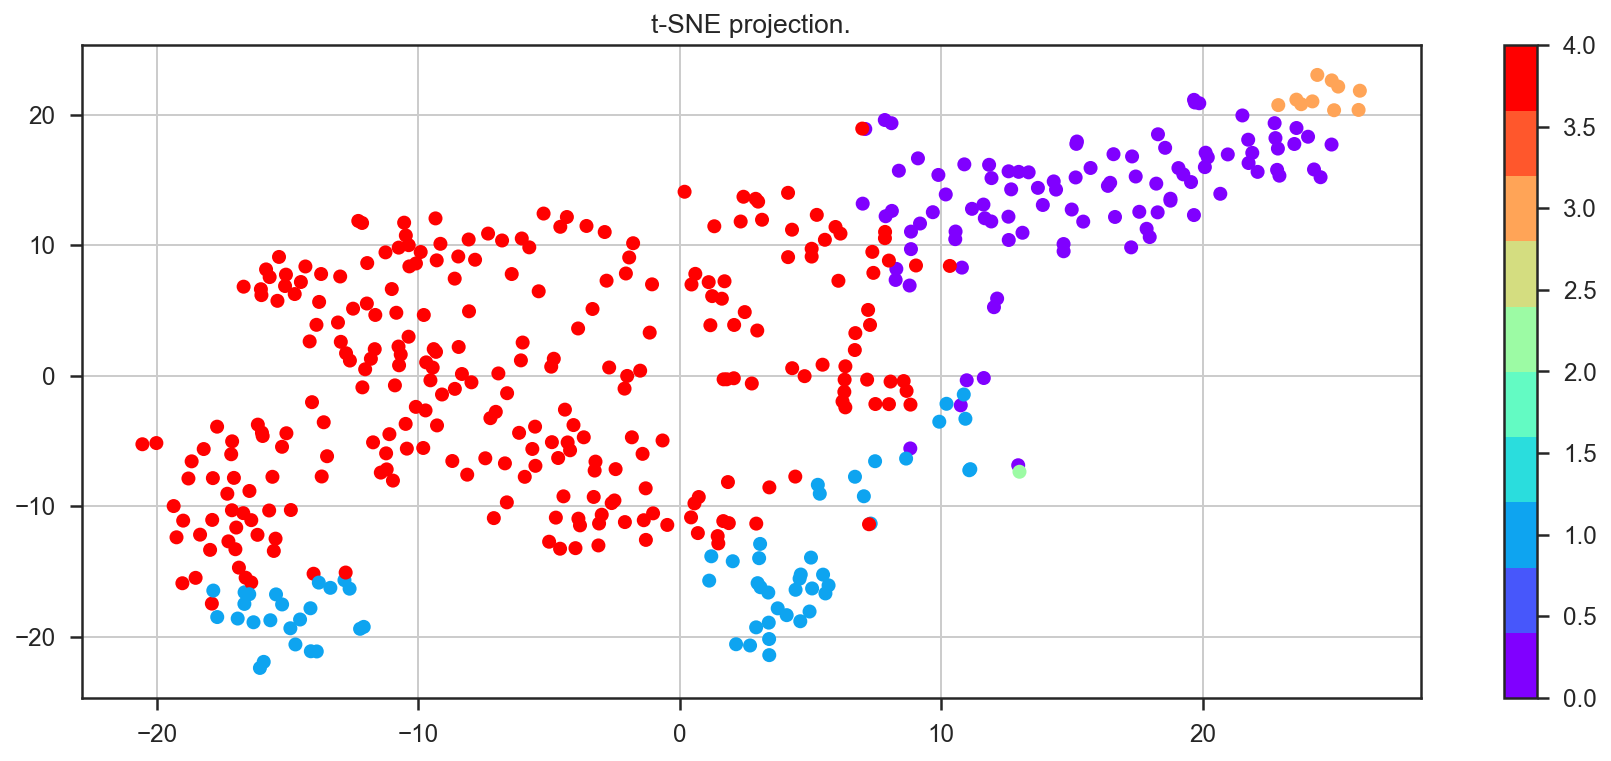

In [54]:
plt.figure(figsize=(15,6))
plt.scatter(X_tsne_data['COMP1'],X_tsne_data['COMP2'],c=X_tsne_data['Target'],cmap=plt.get_cmap('rainbow',10))
plt.grid()
plt.colorbar()
plt.title('t-SNE projection.')
plt.show()

## Thank You !!